In [167]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from os.path import join, exists
from nilearn import datasets, plotting
from scipy.stats import fligner, t, mannwhitneyu

In [ ]:
def plot_surfaces(nifti, surf, cmap, vmax, threshold):
    '''
    Plots of medial and lateral left and right surface views from nifti volume
    '''
    
    texture_l = surface.vol_to_surf(nifti, surf.pial_left, interpolation='nearest')
    texture_r = surface.vol_to_surf(nifti, surf.pial_right, interpolation='nearest')
    
    fig = plt.figure(figsize=(12,4))
    gs = GridSpec(1, 4)

    ax0 = fig.add_subplot(gs[0], projection='3d')
    ax1 = fig.add_subplot(gs[1], projection='3d')
    ax2 = fig.add_subplot(gs[2], projection='3d')
    ax3 = fig.add_subplot(gs[3], projection='3d')
    plt.tight_layout(w_pad=-1, h_pad=-1)
    figure = plotting.plot_surf_stat_map(surf.pial_left, 
                                         texture_l, 
                                         symmetric_cbar=False, 
                                         threshold=threshold,
                                         cmap=cmap, 
                                         view='lateral', 
                                         colorbar=False, 
                                         vmax=vmax, 
                                         axes=ax0)
    figure = plotting.plot_surf_stat_map(surf.pial_left, 
                                         texture_l, 
                                         symmetric_cbar=False, 
                                         threshold=threshold,     
                                         cmap=cmap, 
                                         view='medial', 
                                         colorbar=False, 
                                         vmax=vmax, 
                                         axes=ax1)
    figure = plotting.plot_surf_stat_map(surf.pial_right, 
                                         texture_r, 
                                         symmetric_cbar=False, 
                                         threshold=threshold,
                                         cmap=cmap, 
                                         view='lateral', 
                                         colorbar=False, 
                                         vmax=vmax, 
                                         axes=ax2)
    figure = plotting.plot_surf_stat_map(surf.pial_right, 
                                         texture_r, 
                                         symmetric_cbar=False, 
                                         threshold=threshold,     
                                         cmap=cmap, 
                                         view='medial', 
                                         colorbar=False, 
                                         vmax=vmax, 
                                         axes=ax3)
    return figure

In [ ]:
sns.set(style='whitegrid', context='talk')
plt.rcParams["font.family"] = "monospace"
#plt.rcParams['font.monospace'] = 'Courier'

In [ ]:
PROJ_DIR = "/Volumes/projects_herting/LABDOCS/Personnel/Katie/deltaABCD_clustering/"
DATA_DIR = "data/"
FIGS_DIR = "figures/"
OUTP_DIR = "output/"

In [ ]:
abcd_dir = (
    "/Volumes/projects_herting/LABDOCS/PROJECTS/ABCD/Data/release4.0/"
)

In [ ]:
crayons = sns.crayon_palette(['Aquamarine', 'Fuchsia', 
                              'Jungle Green', 'Fern'])

In [ ]:
# Residential history derived - annual average of PM 2.5 in 2016

In [ ]:
df = pd.read_csv(join(PROJ_DIR, DATA_DIR, "data_qcd.csv"), index_col=0, header=0)

In [ ]:
pm25 = pd.read_csv(join(abcd_dir, 'csv', 'abcd_rhds01.csv'), 
                   index_col=0, 
                   header=0,
                   skiprows=[1],
                   usecols=["subjectkey", "eventname", "reshist_addr1_pm252016aa"])

In [ ]:
pm25 = pm25[pm25['eventname'] == 'baseline_year_1_arm_1']


In [ ]:
df = pd.concat([df, pm25.drop('eventname', axis=1)], axis=1).dropna(thresh=1000, axis=0)

In [ ]:
morph_pal = sns.cubehelix_palette(n_colors=4, start=0.6, rot=-0.6, gamma=1.0, hue=0.7, light=0.6, dark=0.3)
morph_cmap = sns.cubehelix_palette(n_colors=4, start=0.6, rot=-0.6, gamma=1.0, hue=0.7, light=0.3, dark=0.2, 
                                   as_cmap=True, reverse=True)
cell_pal = sns.cubehelix_palette(n_colors=7, start=1.7, rot=-0.8, gamma=1.0, hue=0.7, light=0.6, dark=0.3)
cell_cmap = sns.cubehelix_palette(n_colors=7, start=1.7, rot=-0.8, gamma=1.0, hue=0.7, light=0.3, dark=0.2, 
                                  as_cmap=True, reverse=True)
func_pal = sns.cubehelix_palette(n_colors=4, start=3.0, rot=-0.6, gamma=1.0, hue=0.7, light=0.6, dark=0.3)
func_cmap = sns.cubehelix_palette(n_colors=4, start=3.0, rot=-0.6, gamma=1.0, hue=0.7, light=0.3, dark=0.2, 
                                  as_cmap=True, reverse=True)
big_pal = morph_pal + cell_pal + func_pal

In [ ]:
sns.palplot(big_pal)

In [ ]:

deltasmri_complete = pd.concat([df.filter(regex='smri.*change_score'), 
                                df.filter(regex='mrisdp.*change_score')], axis=1).dropna()
deltarsfmri_complete = df.filter(regex='rsfmri.*change_score').dropna(how='any')
deltarsi_complete = df.filter(regex='dmri_rsi.*change_score').dropna()
deltadti_complete = df.filter(regex='dmri_dti.*change_score').dropna()

img_modalities = {'smri': deltasmri_complete,
                  'fmri': deltarsfmri_complete,
                  'rsi': deltarsi_complete, 
                  'dti': deltadti_complete}

#morph = img_modalities['smri'].filter(regex='.*vol.*').columns

In [ ]:
# plot the distribution of variances of all structural mri measures
smri_var = img_modalities['smri'].columns
dti_var = img_modalities['dti'].columns
rsi_var = img_modalities['rsi'].columns
# separate wm and gm rsi
rsi_gm = list(img_modalities['rsi'].filter(regex='.*gm').columns) + list(img_modalities['rsi'].filter(regex='.*scs').columns)
rsi_wm = list(set(rsi_var) - set(rsi_gm))
rsi_scs = list(img_modalities['rsi'].filter(regex='.*scs').columns)
fmri_var = img_modalities['fmri'].columns
fc_cort_var = img_modalities['fmri'].filter(regex='_c_.*').columns
fc_scor_var = img_modalities['fmri'].filter(regex='_cor_.*').columns
fmri_var_var = img_modalities['fmri'].filter(regex='_var_.*').columns

#morph_var = df[df['concept'] == 'macrostructure'].index
#cell_var = df[df['concept'] == 'microstructure'].index
func_var = list(fmri_var_var) 
conn_var = list(fc_cort_var) + list(fc_scor_var)

btwn_fc = []
wthn_fc = []
for var in fc_cort_var:
    var_list = var[:-13].split('_')
    #print(var_list)
    if var_list[3] == var_list[5]:
        #print(var, 'within-network')
        wthn_fc.append(var)
    else:
        btwn_fc.append(var)
        #print(var, 'between-network')

In [ ]:
imaging_apd = list(deltasmri_complete.columns) + list(deltadti_complete.columns) + list(deltarsi_complete.columns) + list(deltarsfmri_complete.columns)

In [140]:
concepts = {'morph': ['thick', 
                      'area', 
                      'vol',
                      'dtivol'],
            'cell': ['t1wcnt', 
                     'rsirni', 
                     'rsirnd',
                     'rsirnigm', 
                     'rsirndgm',
                     'dtifa', 
                     'dtimd',
                     'dtild', 
                     'dtitd'],
            'func':['var',
                    'c',
                    'cor',
                    #'subcortical-network fc'
                   ]}

In [ ]:
pm25 = pm25.drop('eventname', axis=1)

In [141]:
long_names = {'var': 'BOLD',
              'between-network fc': 'FC (btwn)',
              'within-network fc': 'FC (wthn)',
              'subcortical-network fc': 'FC (sc)',
              'dtivol': 'WMV',
              'vol': 'GMV',
              'thick': 'CT',
              'area': 'CA',
              'dtifa': 'FA',
              'dtimd': 'MD',
              'dtild': 'LD',
              'dtitd': 'TD',
              'rsirni': 'RNI',
              'rsirnd': 'RND',
              'rsirnigm': 'RNI (gm)',
              'rsirndgm': 'RND (gm)',
              't1wcnt': 'G/W'}

In [ ]:
pm25.describe()

In [ ]:
low_pm_indices = df['reshist_addr1_pm252016aa'] <= 6.594166
midlow_pm_indices = df['reshist_addr1_pm252016aa'].between(6.594166, 7.733803, inclusive='right')
midhi_pm_indices = df['reshist_addr1_pm252016aa'].between(7.733803, 8.666487, inclusive='right')
high_pm_indices = df['reshist_addr1_pm252016aa'] >= 8.666487
#df.loc[, 'pm25_quantile'] = 1

In [ ]:
df.loc[low_pm_indices, 'pm25_quantile'] = 1
df.loc[midlow_pm_indices, 'pm25_quantile'] = 2
df.loc[midhi_pm_indices, 'pm25_quantile'] = 3
df.loc[high_pm_indices, 'pm25_quantile'] = 4

In [198]:
len(df[df['pm25_quantile'] == 4].index)

1795

In [ ]:
df.columns

In [142]:
# need to calculate mean & sd for each imaging variable change score
# redo descriptives by PM2.5 quantile?
descriptives = pd.DataFrame(columns=['concept', 'atlas', 'measure'])

for var in imaging_apd:
    descriptives.at[var,'APR_1'] = df[df['pm25_quantile'] == 1.][var].mean()
    descriptives.at[var,'APR_2'] = df[df['pm25_quantile'] == 2.][var].mean()
    descriptives.at[var,'APR_3'] = df[df['pm25_quantile'] == 3.][var].mean()
    descriptives.at[var,'APR_4'] = df[df['pm25_quantile'] == 4.][var].mean()
    descriptives.at[var,'STD_1'] = df[df['pm25_quantile'] == 1.][var].std()
    descriptives.at[var,'STD_2'] = df[df['pm25_quantile'] == 2.][var].std()
    descriptives.at[var,'STD_3'] = df[df['pm25_quantile'] == 3.][var].std()
    descriptives.at[var,'STD_4'] = df[df['pm25_quantile'] == 4.][var].std()
    if 'mrisdp' in var:
        var_num = int(var.split('.')[0].split('_')[-1])
        descriptives.at[var, 'atlas'] = 'dtx'
        if var_num <= 148:
            descriptives.at[var, 'concept'] = 'macrostructure'
            descriptives.at[var, 'measure'] = 'thick'
        elif var_num <= 450 and var_num >= 303:
            descriptives.at[var, 'concept'] = 'macrostructure'
            descriptives.at[var, 'measure'] = 'area'
        elif var_num < 604 and var_num >= 450:
            descriptives.at[var, 'concept'] = 'macrostructure'
            descriptives.at[var, 'measure'] = 'vol'
        elif var_num <= 1054 and var_num >= 907:
            descriptives.at[var, 'concept'] = 'cellular architecture'
            descriptives.at[var, 'measure'] = 't1wcnt'
        elif var_num == 604:
            descriptives.at[var, 'concept'] = 'macrostructure'
            descriptives.at[var, 'measure'] = 'vol'
    elif '_' in var:
        var_list = var.split('.')[0].split('_')
        descriptives.at[var, 'measure'] = var_list[1]
        descriptives.at[var, 'atlas'] = var_list[2]
        if var_list[1] in concepts['morph']:
            descriptives.at[var, 'concept'] = 'macrostructure'
        elif var_list[1] in concepts['cell']:
            descriptives.at[var, 'concept'] = 'microstructure'
        if var_list[1] in concepts['func']:
            descriptives.at[var, 'concept'] = 'function'
        if var in btwn_fc:
            descriptives.at[var, 'measure'] = 'between-network fc'
        elif var in wthn_fc:
            descriptives.at[var, 'measure'] = 'within-network fc'
        elif var in fc_scor_var:
            descriptives.at[var, 'measure'] = 'subcortical-network fc'
        elif var in rsi_scs:
            if 'rsirni' in var:
                descriptives.at[var, 'measure'] = 'rsirnigm'
            elif 'rsirnd' in var:
                descriptives.at[var, 'measure'] = 'rsirndgm'
            

In [143]:
concepts

{'morph': ['thick', 'area', 'vol', 'dtivol'],
 'cell': ['t1wcnt',
  'rsirni',
  'rsirnd',
  'rsirnigm',
  'rsirndgm',
  'dtifa',
  'dtimd',
  'dtild',
  'dtitd'],
 'func': ['var', 'c', 'cor']}

In [144]:
drop = ['dtx', 'meanmotion',
       'subthreshnvols', 'subtcignvols', 'ntpoints']
drop_var = []
for var in drop:
    drop_var += list(descriptives[descriptives['atlas'] == var].index)

In [145]:
measures = list(descriptives['measure'].unique())
concepts = ['macrostructure', 'microstructure', 'function']

In [146]:

descriptives.drop(list(drop_var), axis=0, inplace=True)

In [147]:
sub_df = descriptives[descriptives['concept'] == 'macrostructure']
sub2_df = descriptives[descriptives['concept'] == 'microstructure']
sub_df = pd.concat([sub_df, sub2_df])
sub_df.replace(long_names, inplace=True)

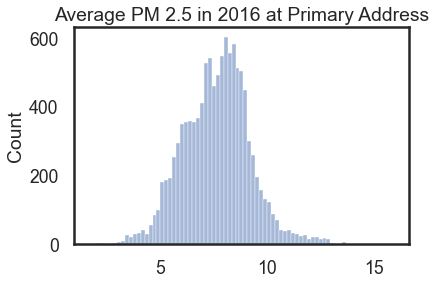

In [192]:
g = sns.histplot(pm25)
g.get_legend().set_visible(False)
g.set_title('Average PM 2.5 in 2016 at Primary Address')
plt.show()

In [149]:
whole_brain_measures = ["smri_vol_scs_intracranialv",
                        "smri_vol_cdk_total",
                        "mrisdp_604", 
                        "dmri_dtifa_fiberat_allfibers",
                        "dmri_dtimd_fiberat_allfibers", 
                        "dmri_dtivol_fiberat_allfibers"]

## Plot brain changes by PM2.5 quantile
Plot *all* measures' means by PM2.5 quantile (like I did in the original APdelta plotting code)


<AxesSubplot:xlabel='APR_1', ylabel='Density'>

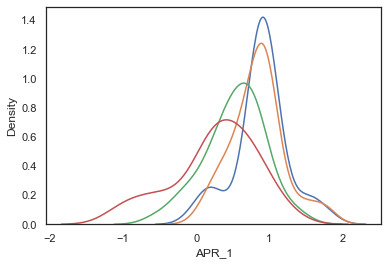

In [150]:
fa_df = descriptives[descriptives['measure'] == 'dtifa']
sns.kdeplot(fa_df['APR_1'], shade=False)
sns.kdeplot(fa_df['APR_2'], shade=False)
sns.kdeplot(fa_df['APR_3'], shade=False)
sns.kdeplot(fa_df['APR_4'], shade=False)

In [151]:
descriptives = descriptives.dropna(how='all', axis=1)

In [152]:
long = descriptives[['concept', 'measure',
              'APR_1', 'APR_2', 'APR_3', 'APR_4']].melt(id_vars=['concept', 'measure'], 
                                                        var_name='PM2.5', 
                                                        value_name='APC').dropna()

In [153]:
long.replace({'APR_1': 'Q1',
              'APR_2': 'Q2',
              'APR_3': 'Q3',
              'APR_4': 'Q4'}, 
             inplace=True)

In [154]:
palettes = {'macrostructure': morph_pal,
            'microstructure': cell_pal,
            'function': func_pal}

In [155]:
measures = descriptives['measure'].unique()

In [165]:
sns.set(style="white", 
        context="poster", 
        font_scale=0.8,
        rc={"axes.facecolor": (0, 0, 0, 0),
            #"font.monospace": 'Avenir Next Condensed',
            "font.family": 'sans serif'})

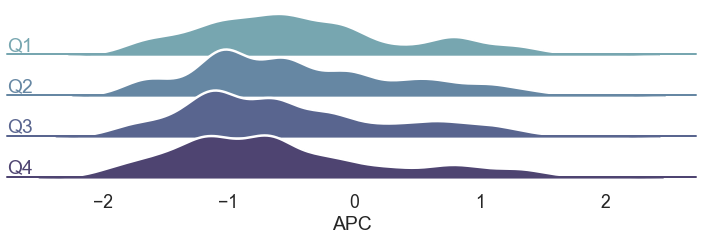

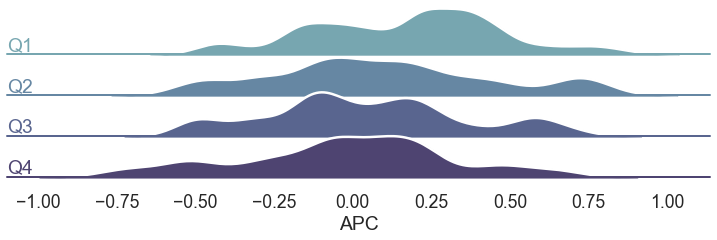

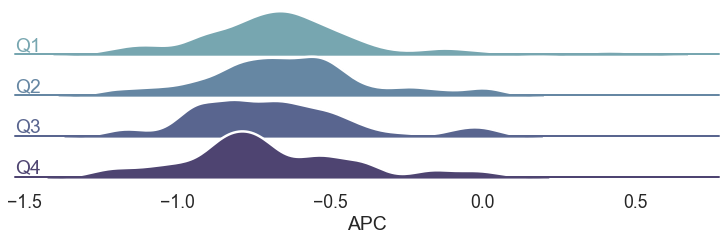

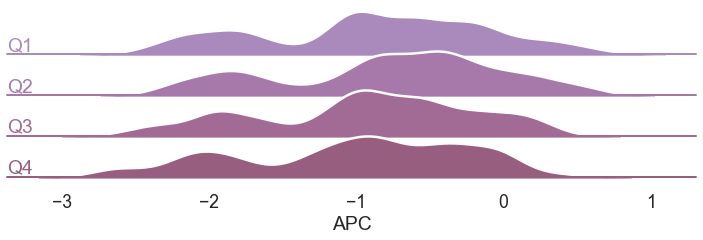

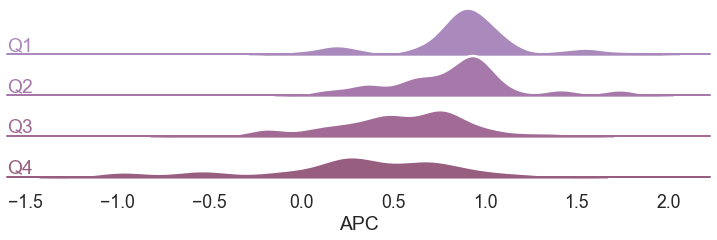

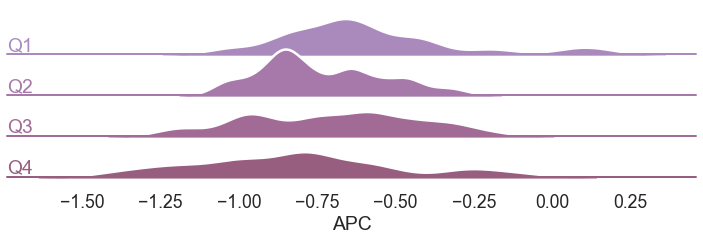

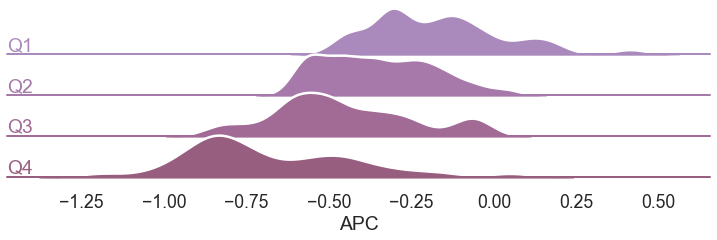

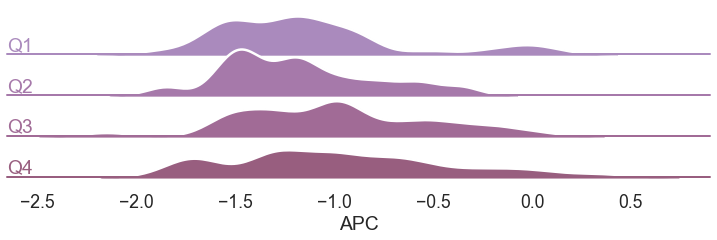

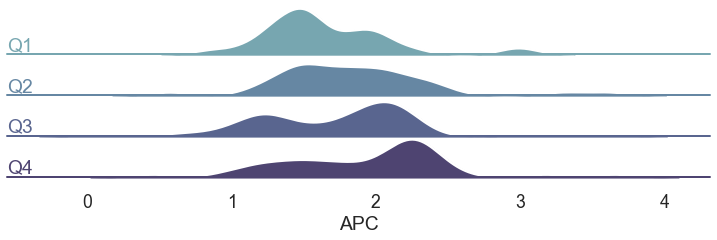

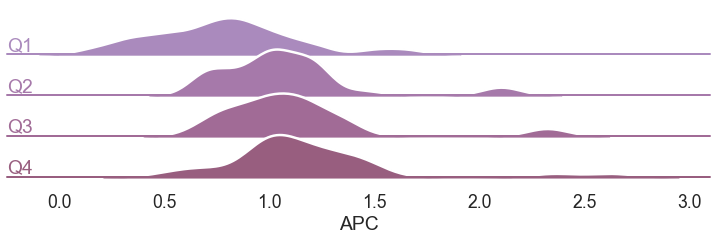

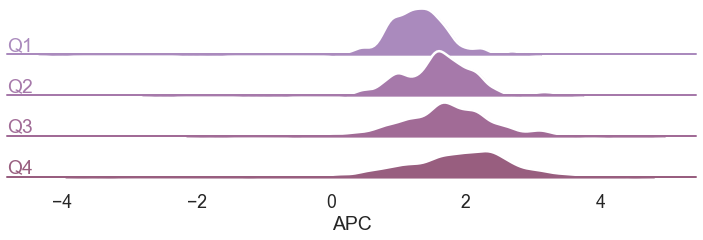

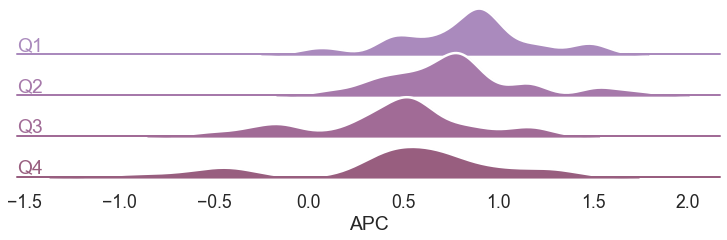

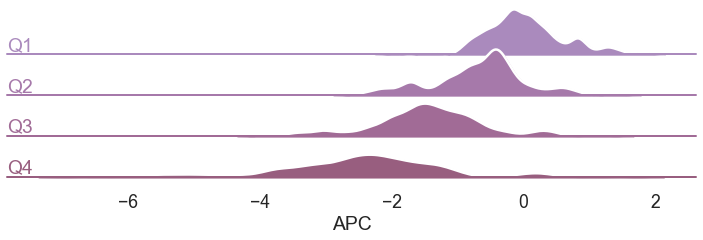

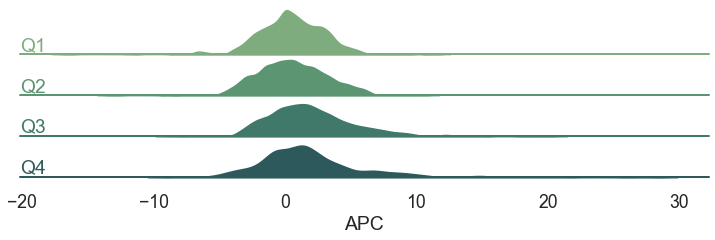

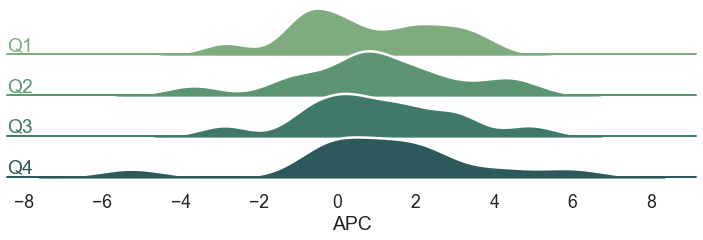

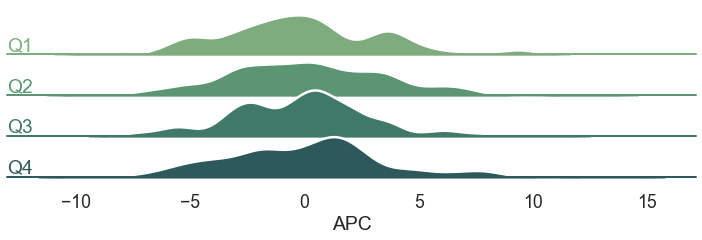

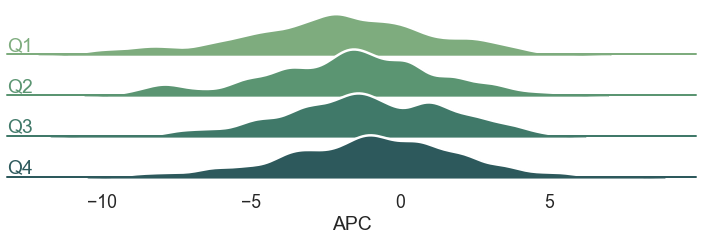

In [166]:
for measure in measures:
    temp_df = long[long['measure'] == measure]
    concept = temp_df['concept'].unique()[0]
    pal = palettes[concept]
    
    #sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
    g = sns.FacetGrid(temp_df, 
                      row="PM2.5", #row_order=[1.0, 2.0, 3.0, 4.0],
                      hue="PM2.5", #hue_order=[1.0, 2.0, 3.0, 4.0],
                      aspect=11, height=1, palette=pal)

    # Draw the densities in a few steps
    g.map(sns.kdeplot, "APC",
          bw_adjust=.5, clip_on=False,
          fill=True, alpha=1, linewidth=1.5)
    g.map(sns.kdeplot, "APC", clip_on=False, color="w", lw=2.5, bw_adjust=.5)

    # passing color=None to refline() uses the hue mapping
    g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

    # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.text(0, .2, label, #fontweight="bold", 
                color=color,
                ha="left", va="center", transform=ax.transAxes)


    g.map(label, "APC")

    # Set the subplots to overlap
    g.figure.subplots_adjust(hspace=-.15)

    # Remove axes details that don't play well with overlap
    g.set_titles("")
    g.set(yticks=[], ylabel="")
    g.despine(bottom=True, left=True)
    g.savefig(f'../{FIGS_DIR}/aprXPM2.5_{measure}.png', dpi=400)

In [169]:
from scipy.stats import f_oneway

In [199]:
q1_df = df[df['pm25_quantile'] == 1.]
q2_df = df[df['pm25_quantile'] == 2.]
q3_df = df[df['pm25_quantile'] == 3.]
q4_df = df[df['pm25_quantile'] == 4.]

for var in descriptives.index:
    # run a 1-way anova
    f,p = f_oneway(q1_df[var].dropna(), q2_df[var].dropna(), q3_df[var].dropna(), q4_df[var].dropna())
    
    if p < 0.01:
        descriptives.at[var, 'anova_f'] = f
        descriptives.at[var, 'anova_p'] = p

In [200]:
for measure in measures:
    sig = np.sum(descriptives[descriptives['measure'] == measure]['anova_p'] > 0)
    total = len(descriptives[descriptives['measure'] == measure]['anova_p'].index)
    print(f'{measure}: {sig / total}')

vol: 0.5604395604395604
area: 0.6323529411764706
thick: 0.47058823529411764
t1wcnt: 0.3235294117647059
dtifa: 0.8947368421052632
dtimd: 0.8421052631578947
dtild: 0.9736842105263158
dtitd: 0.9473684210526315
dtivol: 0.8947368421052632
rsirni: 0.9354838709677419
rsirnigm: 0.9236947791164659
rsirnd: 0.967741935483871
rsirndgm: 1.0
var: 0.5976190476190476
within-network fc: 0.23076923076923078
between-network fc: 0.358974358974359
subcortical-network fc: 0.22672064777327935


In [202]:
descriptives['anova_p'].describe()

count     1.195000e+03
mean      4.247473e-03
std       9.910989e-03
min      3.396510e-104
25%       2.940472e-23
50%       2.514208e-09
75%       1.468570e-03
max       4.981054e-02
Name: anova_p, dtype: float64